# **Setup**

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [16]:
# Read the dataset
df = pd.read_csv("abalone_original.csv")
# Rename Columns
df.columns = df.columns.str.replace('-','_').str.capitalize()
print("Columns after renaming:")
print(df.columns)  

# Display first few rows and basic information
print("First few rows of the dataset:")
print(df.head())
print("\nDataset information:")
print(df.info())

# Basic statistical summary
print("\nBasic statistical summary:")
print(df.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Columns after renaming:
Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')
First few rows of the dataset:
  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M      91        73      19         102.8            44.9            20.2   
1   M      70        53      18          45.1            19.9             9.7   
2   F     106        84      27         135.4            51.3            28.3   
3   M      88        73      25         103.2            43.1            22.8   
4   I      66        51      16          41.0            17.9             7.9   

   Shell_weight  Rings  
0          30.0     15  
1          14.0      7  
2          42.0      9  
3          31.0     10  
4          11.0      7  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Nu

# **Sex Wise Grouped Summary**

In [17]:
# Gender Wise Mean
df.groupby(by='Sex').mean()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Sex,,,,,,,,
F,115.818669,90.946442,31.602142,209.306427,89.237567,46.137720,60.401989,11.129304
I,85.549180,65.298808,21.599106,86.272504,38.207004,18.402012,25.636438,7.890462
M,112.278141,87.857330,30.276178,198.291885,86.589202,43.108901,56.393848,10.705497


In [23]:
# Gender Wise Aggregation
df.groupby(by='Sex').agg({'Length':['size','min','max','mean','std'],'Diameter':['mean','std']})

Length                                   Diameter           
      size min  max        mean        std       mean        std
Sex                                                             
F     1307  55  163  115.818669  17.231911  90.946442  14.190841
I     1342  15  145   85.549180  21.771545  65.298808  17.621786
M     1528  31  156  112.278141  20.539463  87.857330  16.879613

# **Histogram**

<Figure size 1500x1000 with 0 Axes>

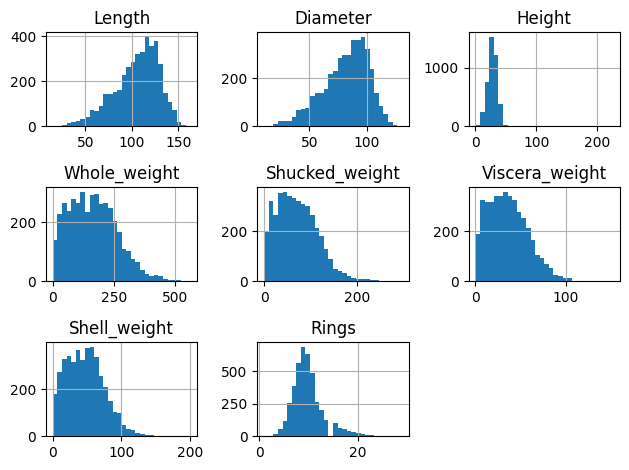

In [18]:
# Create histograms for numerical variables
plt.figure(figsize=(15, 10))
df.select_dtypes(include=[np.number]).hist(bins=30)
plt.tight_layout()
plt.show()

<Axes: >

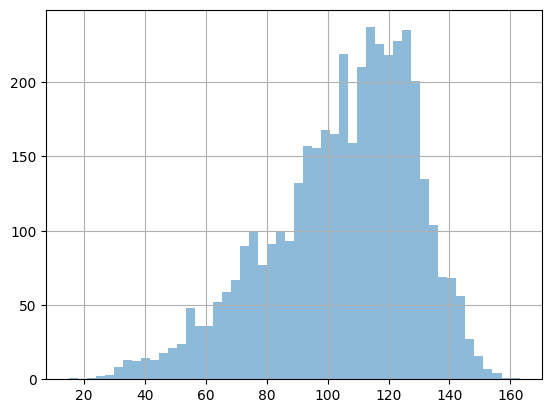

In [24]:
# Histogram 
df['Length'].hist(bins=50, alpha=0.5)

# **Box Plots**

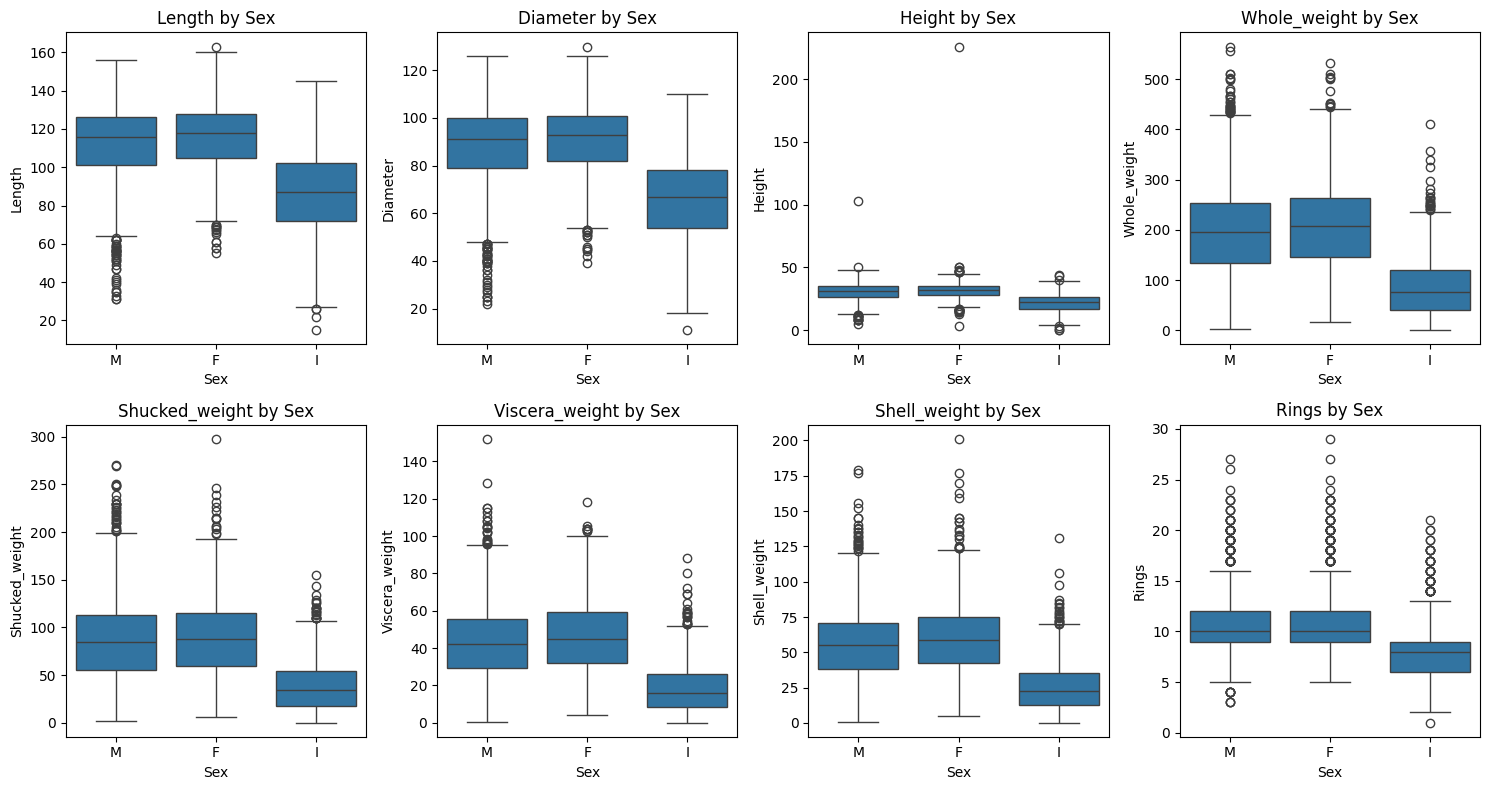

In [19]:
# Create box plots for numerical variables by sex
plt.figure(figsize=(15, 8))
numerical_cols = df.select_dtypes(include=[np.number]).columns
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Sex', y=col, data=df)
    plt.title(f'{col} by Sex')
plt.tight_layout()
plt.show()

# **Correlation Heatmap**

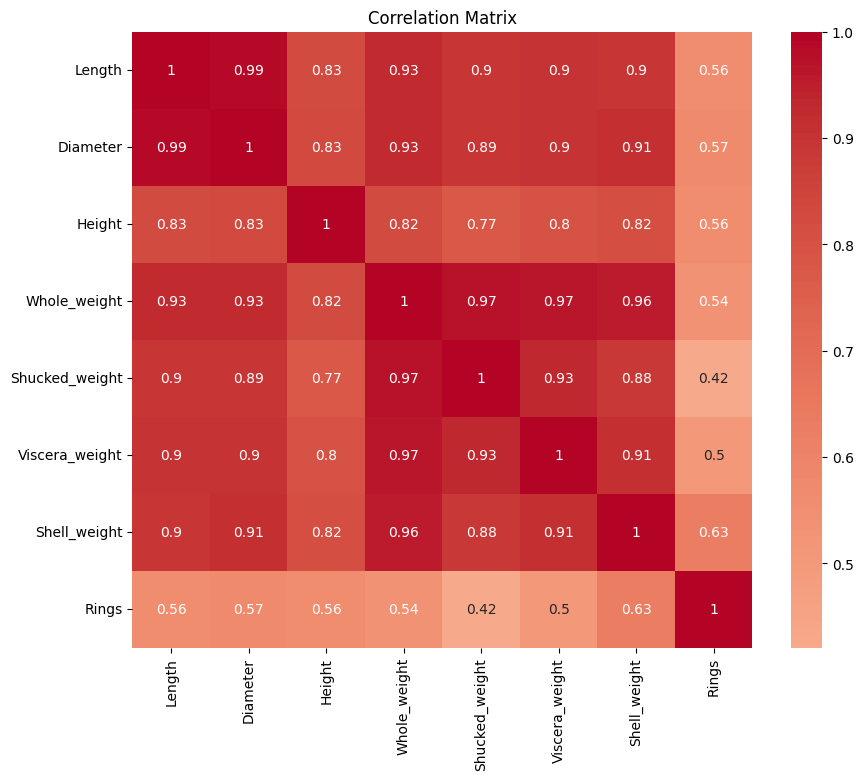

In [20]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# **Normality Test**

In [21]:
# Basic statistical tests
# Test for normality (Shapiro-Wilk test) for numerical variables
print("\nNormality tests (Shapiro-Wilk):")
for col in numerical_cols:
    stat, p_value = stats.shapiro(df[col])
    print(f"{col}: p-value = {p_value:.4f}")


Normality tests (Shapiro-Wilk):
Length: p-value = 0.0000
Diameter: p-value = 0.0000
Height: p-value = 0.0000
Whole_weight: p-value = 0.0000
Shucked_weight: p-value = 0.0000
Viscera_weight: p-value = 0.0000
Shell_weight: p-value = 0.0000
Rings: p-value = 0.0000


# **ANOVA Test**

In [22]:
# One-way ANOVA test for differences between Sex groups
print("\nOne-way ANOVA test results:")
for col in numerical_cols:
    f_stat, p_value = stats.f_oneway(
        df[df['Sex'] == 'M'][col],
        df[df['Sex'] == 'F'][col],
        df[df['Sex'] == 'I'][col]
    )
    print(f"{col}: p-value = {p_value:.4f}")


One-way ANOVA test results:
Length: p-value = 0.0000
Diameter: p-value = 0.0000
Height: p-value = 0.0000
Whole_weight: p-value = 0.0000
Shucked_weight: p-value = 0.0000
Viscera_weight: p-value = 0.0000
Shell_weight: p-value = 0.0000
Rings: p-value = 0.0000
